<a href="https://colab.research.google.com/github/MllrJhssl/DC/blob/master/FinalProgramacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN PROGRAMACIÓN 2

Nombres y apellidos: Miller Jhassel Romero Gutierrez

Código: 15160199

***
Instrucciones:
- El examen es personal
- Se puede usar internet
- Una vez terminado, descargar en formato **.ipynb** su examen con su código de estudiante y subir a esta [carpeta compartida](https://drive.google.com/drive/folders/1OGrAClV82XRbY2wDRryg26akB-TWvBid) (ejemplo: 17160099.ipynb)
- **En caso tengan la idea, pero no le sale, se considerará explicar lo que quiere realizar.**
***

## PREGUNTAS

### **1. Teoría** (0.5 pt c/u)

1_1 Explique **con sus propias palabras** qué es Git y para qué sirve.

Un git es un controlodar de versiones lo cual sigue una metodologia para trabajar un proyecto

1_2 **Con sus propias palabras** define qué son los índices y qué es la identación.

indices, el cual nos da una posicion dada en la lista con un numero el cual empieza con ceroy la identancion es el espacio en blanco que se da entre las sentencias.

**1_3** Cómo se realiza una consulta (subset) en una lista, diccionario y data frame.

1_4 Cuál es la diferencia entre un DataFrame y un GeoDataFrame.

es un estructura de pandas que se forma a partir de una lista o diccionarios y series, donde especificamos columnas y filas, el geodataframe se crea a partir de un dataframe donde tienen columnas o filas con geometrias para la cual usa geopandas 

1_5 Explique **con sus propias palabras** para qué puede servir usar geocódigos.


1_6 Explique con sus propias palabras qué es un boxplot.

El diagrama de caja que se en matplotlib que usa el boxplot para generar graficos en base a diferentes datos en un determinado tiempo

1_7 Mencione **con sus propias palabras** alguna utilidad de Google Earth Engine.

El GEE proporciona informacion de datos para analisar para un trabajo, sea verificar los tiempos de cambio de uso de suelo, topografia, areas urbanas etc, esto a gracias a la informacion actualizada que proporciona google

1_8 Explique **con sus propias** palabras 2 librerías para el manejo de datos espaciales.

la libreria fiona que transforma datos, la de shapely que crea geometrias

1_9 Explique con sus propias palabras para qué puede servir web scrapping.

se usa extraer informacion de una base de datos, de esa forma se extrae el HTML el cual muestra los datos de una pagina

1_10 ¿Dentro de los GIS web, qué son los tiles? Mencione algunas fuentes.

### **2. Sintaxis de python:** (2pt c/u)

2_1 Existen muchas formas de normalizar tus datos, una muy común es la siguiente: 

$$X_{normalized} = \frac{X - X_{media}} {X_{stddev}}$$

Cómo se aplicaría esa fórmula a la siguiente lista.

In [0]:
dato = [6,6,6,8,6,8,6,6,4,6,6,6,6,4,6,4,4,4,4,2,2,4,10,4,4,10,4,6,4,6,2,2,4,2,2,4,2,2,2,4,4,4,2,2,6,2,4,4,8,8,2,4,4,4,6,2,4,4,2,6,2,8,4,2,4,2,4,4,4,4,4,4,8,10,2,2,4,4,4,4,4,4,2] # Datos referenciales

2_2 Crea una función que hayas aplicado en algún otro curso en el que estés matriculado. Explique.

### **3. Manipulación de datos espaciales:** (11 pt)

3_1 Leer el archivo de [Precipitaciones](https://raw.githubusercontent.com/ryali93/ExamenProgramacion/master/data/precipitaciones.csv) y crear un DataFrame. (1pt)

In [0]:

import pandas as pd
import json 
import requests

In [0]:
!pip install fiona
!pip install shapely 
!pip install geopandas 
!pip install descartes
!pip install mapclassify
from geopandas import GeoDataFrame 
from shapely.geometry import Point 

In [0]:
from datetime import datetime
import fiona


In [0]:
data = pd.read_csv('precipitaciones.csv',sep=";")
data.head()
df = pd.DataFrame(data)
df.head()

,FECHA,ASUNCION,CHILETE,CONTUMAZA,GRANJA PORCON,HACIENDA LLAGADEN,HACIENDA TUNAD,LAGU COMPUERTAS,LAS PALTAS,LIVES,LLAPA,MAGDALENA,MONTEGRANDE,QUEBRADA HONDA,SAN JUAN,SAN MIGUEL,SAN PABLO,TEMBLADERA
0,1-3-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-3-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3-3-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4-3-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5-3-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3_2 Hacer una consulta al DataFrame para identificar **cuál es la estación donde más llovió y qué día fue**. (2pt)

In [0]:
df.max()

FECHA                9-9-2014
ASUNCION                 80.2
CHILETE                  48.6
CONTUMAZA                 412
GRANJA PORCON            88.2
HACIENDA LLAGADEN        42.3
HACIENDA TUNAD           46.1
LAGU COMPUERTAS          43.5
LAS PALTAS               62.5
LIVES                   101.9
LLAPA                      59
MAGDALENA                49.6
MONTEGRANDE               110
QUEBRADA HONDA           62.2
SAN JUAN                 74.1
SAN MIGUEL              100.3
SAN PABLO                55.4
TEMBLADERA              108.3
dtype: object

In [0]:
a = df.columns
a[3]

'CONTUMAZA'

In [0]:
b = df.max()
b[0]

'9-9-2014'

3_3 Leer el archivo de [estaciones](https://raw.githubusercontent.com/ryali93/ExamenProgramacion/master/data/estaciones.csv) y crear un DataFrame. (1 pt)

In [0]:
dat = pd.read_csv('estaciones.csv')
dat.head()
df = pd.DataFrame(dat)
df.head()

,Unnamed: 0,COD_ESTA,NOM_ESTA,COD_TIPEST,TIP_EST,COD_SUBEST,TIP_SUBEST,COD_EST,ESTADO,ANO_INICIO,ANO_FINAL,COD_DEP,NOM_DEP,COD_PRO,NOM_PRO,COD_DIS,NOM_DIS,COD_AAA,NOM_AAA,COD_ALA,NOM_ALA,COD_VER,NOM_VER,COD_CUE,NOM_CUE,LONGITUD,LATITUD,ALTITUD,INSTI_OPER,RIO,AREACAP,COORDX,COORDY
0,0,210402,LAGUNILLAS,1,HIDROMETRICA,HLM,LIMNIMETRICA,C,CERRADO,1961,,21,PUNO,2107,LAMPA,210709,SANTA LUCIA,14,TITICACA,56.0,Coata - Ilpa,0,TITICACA,176,Cuenca Coata,"70°42'00.0""""","15°42'00.0""""",4200,SENAMHI,LAGUNILLAS,0.0,-70.700000,-15.700000
1,1,210403,RIO VERDE,1,HIDROMETRICA,HLG,LIMNIGRAFICA,F,FUNCIONANDO,1969,,21,PUNO,2107,LAMPA,210709,SANTA LUCIA,14,TITICACA,56.0,Coata - Ilpa,0,TITICACA,176,Cuenca Coata,"70°42'42.9""""","15°33'42.2""""",4250.00,SENAMHI,RIO VERDE,0.0,-70.711917,-15.561722
2,2,210404,SARACOCHA,1,HIDROMETRICA,HLM,LIMNIMETRICA,C,CERRADO,1961,,21,PUNO,2107,LAMPA,210709,SANTA LUCIA,14,TITICACA,56.0,Coata - Ilpa,0,TITICACA,176,Cuenca Coata,"70°37'00.0""""","15°45'00.0""""",4300,SENAMHI,,0.0,-70.616667,-15.750000
3,3,210401,PUENTE MARAVILLAS,1,HIDROMETRICA,HLM,LIMNIMETRICA,P,PARALIZADA,1956,,21,PUNO,2111,SAN ROMAN,211101,JULIACA,14,TITICACA,56.0,Coata - Ilpa,0,TITICACA,176,Cuenca Coata,"70°08'00.0""""","15°26'00.0""""",3828,SENAMHI,COTA,0.0,-70.133333,-15.433333
4,4,210405,PUENTE MOCAYACHE-LAMPA,1,HIDROMETRICA,HLM,LIMNIMETRICA,F,FUNCIONANDO,1994,,21,PUNO,2111,SAN ROMAN,211101,JULIACA,14,TITICACA,56.0,Coata - Ilpa,0,TITICACA,176,Cuenca Coata,"70°12'32.5""""","15°26'37.9""""",3838.00,SENAMHI,COATA,0.0,-70.209028,-15.443861


3_3 Generar un GeoDataFrame para la consulta a partir de las coordenadas. (3pt)

In [0]:
crs = {'init':'epsg:4326'}
geometry = [Point(x) for x in zip (dat.COORDX, dat.COORDY)]

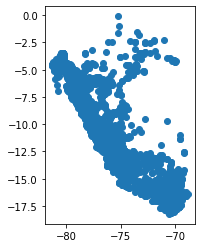

In [0]:
gdf = GeoDataFrame(dat,crs=crs,geometry=geometry)
gdf.head()
gdf.plot()

3_4 Exportar la data creada a un archivo shapefile y visualizar los datos usando Folium. (2pt)

In [0]:
gdf.to_file(driver='ESRI Shapefile', filename='dat.shp')

In [0]:
import folium

In [0]:
gjson = gdf.to_crs(epsg='4326').to_json()

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:
mapa = folium.Map([-12,-77], zoom_start=2, tiles ='Stamen Terrain')
points = folium.features.GeoJson(gjson)
mapa.add_children(points)
mapa

In [0]:
este seria el paso final pero no puedo visualizar el mapa 

3_5 Agregar el departamento donde más llovió al mapa folium. (leer archivo [departamentos](https://raw.githubusercontent.com/ryali93/ExamenProgramacion/master/data/departamentos.json)) (2pt)

In [0]:
dat2 = open("departamentos.json","r")
dat3 = dat2.read()
dat3

In [0]:
import json
dat2 = json.loads(dat3)
print(type(dat2))

<class 'dict'>


In [0]:
dat2

lo que segueria seria un filtro como el primer ejercicio donde explica como sacar el valor maximo de lluvia y luego importar el follium para visualizar el mapa como el segundo ejercicios

## **4. Pregunta extra** (5pt)

4_1 Cuando se recolectan datos de campo, generalmente se crea una nube de puntos (ya sean elevaciones o algún dato climático) existen algunas formas de interpolar estos datos; una metodología bastante común es la ecuación IDW o Ponderado de Inversa a la Distancia, que calcula el valor de un punto (desconocido) en base a los valores y las distancias a los demás. Realizar una función que, en base a los valores y distancias, permita calcular este nuevo valor.

Se adjunta ecuación e imagen de cómo se aplica.

$$z_p = \frac{\sum_{i=1}^{n} \frac{z_i} {d_i^p}} {\sum_{i=1}^{n}\frac{1}{d_i^p}}$$

<img width="600" alt="portfolio_view" src="https://community.esri.com/servlet/JiveServlet/download/264856-1-30888/Clip_282.jpg">



